<a href="https://colab.research.google.com/github/kieskatie/resonance_LCR/blob/main/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Structured Programming Coursework: assignment 2

This is due in on Friday December 8th before 2pm. Mark weighting is in brackets. Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

Save your work to GitHub after having run all cells with `Runtime`->`Restart and run all`. You should then do `File`->`Save a copy in GitHub`, do remember to keep the same filename and work directly in the `assignment_2.ipynb` worksheet, adding as many code cells as needed. You can (and should) save as often as possible, only the latest version uploaded before the deadline will be marked.

Your submitted work must abide by university regulations regarding plagiarism. You are encouraged to discuss the work with your classmates, but your submitted work must be written by you alone. You are welcome to copy and paste code from online sources, but you must cite your sources.

Please do not hesistate to e-mail me or come to the office hour with any question about this assignment.

## Exercise 1

A flat metal sheet has the shape of an equilateral triangle of side length 4 metre with a hole in the middle in the shape of an inverted equilateral triangle of side length 1 meter, see the figure below:

![Triangle shape](https://raw.githubusercontent.com/PX2134/images/master/a2/triangle_spape.png)

The area density of the sheet changes with the distance from the centre of the triangle according to the formula $\rho = 1.28\,\left|\, \sin({4.2\,r})\,\right|\,kg\,m^{−2}$ (`rho=1.28*|sin(4.2r)|`).

**Use the Monte Carlo (MC) method** to evaluate:
 1. [4] the area of the triangle
 2. [8] the mass of the triangle.

In doing so, plot an illustrative figure to show the triangle and how points are selected in the MC method (similar to the figure you made for question 2 of week 6). You will need to decide on a suitable number of points for the illustration, and for the calculation of the integral.
**Hints**: re-read the worksheet for week 6 "Monte Carlo" carefully. Avoid loops wherever possible - it is much faster to operate with arrays of data in Python. You can solve this analytically to check your answer if you want to, but the question asks for a Monte-Carlo solution.

In [1]:
import numpy as np
from numpy.random import random, normal, seed, uniform
from numpy import zeros, append, sum, array
import matplotlib.pyplot as plt


area of the triangle 6.4208 m^2


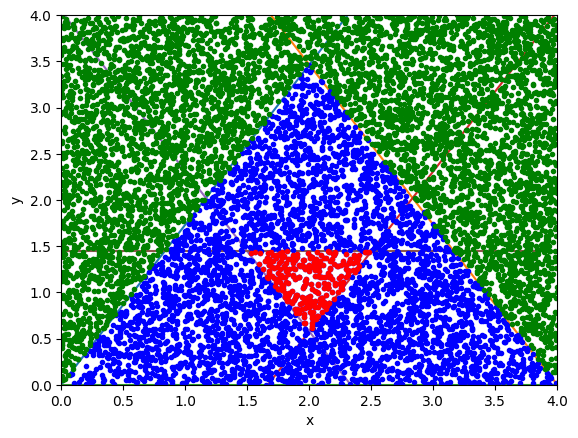

In [7]:
N=10000
#equations of lines for the triangles
def f2(x):
  return np.sqrt(3)*x
def f3(x):
  return -np.sqrt(3)*x+4*np.sqrt(3)
x=np.linspace(0,10)
f1 = np.zeros(len(x))
def f4(x):
  return np.sqrt(3)*x-(5/3)*np.sqrt(3)
def f5(x):
  return -np.sqrt(3)*x+(7/3)*np.sqrt(3)
def f6(x):
  return np.full(x.shape, (5/6)*np.sqrt(3))



#plotting the triangles
plt.plot(x,f2(x))
plt.plot(x,f3(x))
plt.plot(x,f1)
plt.plot(x,f4(x))
plt.plot(x,f5(x))
plt.plot(x,f6(x))
plt.xlim(0,4)
plt.ylim(0,4)
plt.xlabel('x')
plt.ylabel('y')

#random points from a known space
x_points, y_points = 4*np.random.rand(2,N)
#plt.plot(x_points, y_points,'r.')

#Function to test if each point is in the outer triangle
def inTri(x,y):
  a=x<2
  b=f2(x)
  c=y<b

  d=x>2
  e=f3(x)
  f=y<e
  #g=c&f
  result = (a & c) | (d & f)
  return result

#function to test if each point is within the smaller triangle
def tiny(x,y):
    a=x<2
    b=f5(x)
    c=y>b
    k=f6(x)
    n=y<k
    j= a & c & n


    d=x>2
    e=f4(x)
    f=y>e
    k=f6(x)
    n=y<k
    g= d & f & n

    result = j | g
    return result

#using the function on randomised data points
l= inTri(x_points,y_points)
s=tiny(x_points, y_points)

#number of points=the length of the true arrays
little_sum = len((y_points[s==True]))
middle_sum= len((y_points[l==True]))-little_sum
out_sum=len(y_points[l==False])


#plotting points that are in the outer triangle
plt.plot(x_points[l==True], y_points[l==True],'b.')

#plotting points that are outside both triangles
plt.plot(x_points[l==False], y_points[l==False],'g.')

#plotting points that are inside the small triangle
plt.plot(x_points[s==True], y_points[s==True],'r.')

#area is ratio of points in the triangle multiplied by the total area
area = 16*(middle_sum/N)
print('area of the triangle', area,'m^2')






As N increases, the value for area will become more accurate.

In [3]:


#density function

def density(x,y):
  distance= ((x-2)**2+(y-((2/3)*np.sqrt(3)))**2)**0.5
  rho = 1.28*np.abs(np.sin(4.2*distance))
  return rho

#density for the points where conditions are reached
d=density(x_points[l==True], y_points[l==True])

l= inTri(x_points,y_points)
s=tiny(x_points, y_points)


#total mass
mass_cont = area*np.sum(d)/middle_sum


print('mass is',mass_cont,'kg')





mass is 5.9017979370511275 kg


## Exercise 2

 1. [4] Using the 1-D `walk()` function from week 7 "Monte Carlo 2" as guidance, write code to plot out a 2-D random walk with only the up, down, left and right directions possible. So every step is one of four possible directions each time, but while there is an equal probability for up, down and right, there is only a 10% probability for left.

 2. [4] Plot a graph to show the mean squared position as a function of step number for multiple walks as you did for the 1-D case, and discuss.


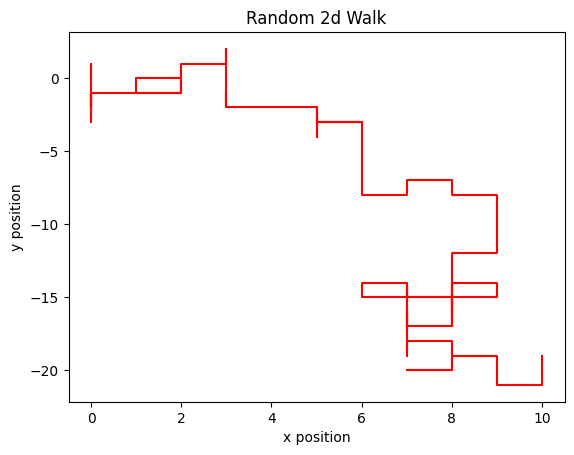

In [4]:
#defining walk function
def walk(steps):
  #empty arrays for x and y
  x=np.zeros(steps)
  y=np.zeros(steps)
  #intial values are (0,0)
  x[0]=0
  y[0]=0
  #defining loop function for each step
  for i in range (1,steps):
    rnd = np.random.randint(1,11)
    #probability of going up
    if rnd == 8 or rnd == 9 or rnd == 10:
      y[i]=y[i-1]+1
      x[i]=x[i-1]
    #probability of going down
    elif rnd == 5 or rnd == 6 or rnd == 7:
      y[i]=y[i-1]-1
      x[i]=x[i-1]
    #probability of going to the right
    elif rnd == 2 or rnd== 3 or rnd == 4:
      x[i]=x[i-1]+1
      y[i]=y[i-1]
    #probability of going to the left
    elif rnd == 1:
      x[i]=x[i-1]-1
      y[i]=y[i-1]
    else:
      print('something has gone wrong')
  return x,y

#plotting walk for 100 steps
position=walk(100)
plt.plot(position[0], position[1],'r')
plt.xlabel('x position')
plt.ylabel('y position')
plt.title('Random 2d Walk')
plt.show()



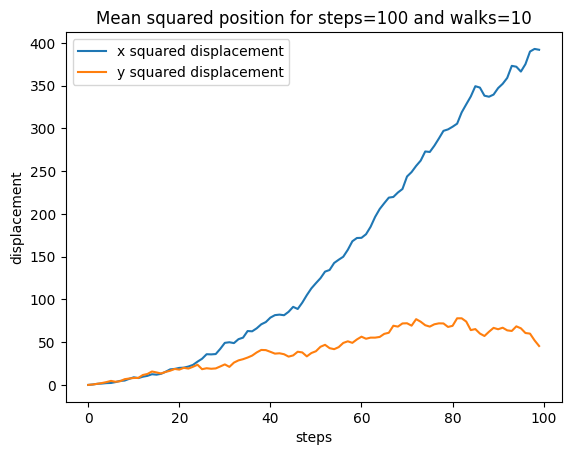

In [5]:
n_steps=100
n_walks=10

#empty arrays for x and y data
x_data = np.zeros((n_walks,n_steps), int)
y_data = np.zeros(( n_walks, n_steps), int)

#for each walk, using the (walk) function and putting in the array
for i in range (n_walks):
  x_data[i,:], y_data[i,:] = walk(n_steps)

#at each step finding the mean postion for x and y
mean_x=np.mean(x_data**2, axis=0)
mean_y=np.average(y_data**2, axis=0)

#x data on the graph is steps
x = np.arange(0,n_steps,1)

#plotting data and formatting
plt.plot(x, mean_x, label='x squared displacement')
plt.plot(x, mean_y, label='y squared displacement')
plt.xlabel('steps')
plt.ylabel('displacement')
plt.title('Mean squared position for steps=100 and walks=10')
plt.legend()



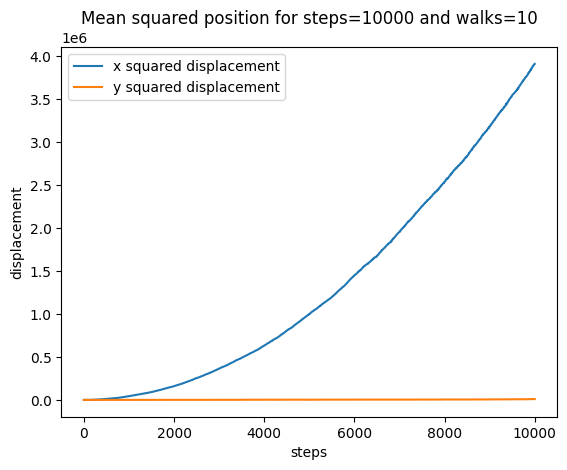

In [6]:
n1_steps=10000
n1_walks=10

#empty arrays for x and y data
x_data = np.zeros((n1_walks,n1_steps), int)
y_data = np.zeros(( n1_walks, n1_steps), int)

#for each walk, using the (walk) function and putting in the array
for i in range (n1_walks):
  x_data[i,:], y_data[i,:] = walk(n1_steps)

#at each step finding the mean postion for x and y
mean_x=np.mean(x_data**2, axis=0)
mean_y=np.average(y_data**2, axis=0)

#x data on the graph is steps
x = np.arange(0,n1_steps,1)

#plotting data and formatting
plt.plot(x, mean_x, label='x squared displacement')
plt.plot(x, mean_y, label='y squared displacement')
plt.xlabel('steps')
plt.ylabel('displacement')
plt.title('Mean squared position for steps=10000 and walks=10')
plt.legend()

The mean squared position for y, should be appromintely 0, as for each step there is an equal probability of going up or down. As x has a much higher probability of going righ than left, the mean squared position will exponentially increase with step number. As the number of steps increases, the mean squared position of y should get closer to 0, and the x mean squared position will get further away from 0.